# Lead Scoring

In [861]:
import numpy as np
import pandas as pd

In [862]:
import matplotlib.pyplot as plt
import seaborn as sns

In [863]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [864]:
#import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [865]:
import warnings

In [866]:
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')
pd.set_option('display.max_columns', None)

## 1.0 Read and inspect Data

In [867]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [868]:
orig_shape = leads.shape
leads.shape

(9240, 37)

In [869]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [870]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

- ### 1.1 Observations
  - The given dataset has 9240 rows and 24 columns
  - We can see that there are many nulls in many of the columns.
  - Further, it has been indicated in the Problem that 'Select' entries are all to be considered Null values.
  - This needs to be checked.

In [871]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- ### 1.2 Observations

We can observe the following:

1. Lead Number, Converted, TotalVisits, Time Spent on Website, Page Views Per Visit, Asymmetrique Activity Score and Asymmetric Profile Score are the only Numeric columns
2. Further, Lead Number is not actually a numeric column. It is an ID. Converted is actually a boolean comlumn
3. That leaves only the next 5 columns as numeric ones
4. Further, there are many nulls in the Activity Score columns and Total Visits

## 2.0 Data Cleaning
1. Convert Yes/No columns to boolean (1/0) columns
2. Check and convert **Select** to null values
3. Create dummy variables and drop unnecessary columns in this regard

- ### 2.1 Replace `Select`, handle Yes/No Columns

In [872]:
leads.replace(to_replace = 'Select', value = np.nan, inplace = True)

In [873]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [874]:
boolean_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', \
               'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',  \
               'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', \
               'Get updates on DM Content', 'I agree to pay the amount through cheque', \
               'A free copy of Mastering The Interview']
leads[boolean_cols] = leads[boolean_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [875]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


-  ### 2.2 Null Values

In [876]:
null_cols_count = leads.isnull().sum()
print(null_cols_count)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [877]:
null_cols_pct = round(null_cols_count*100/leads.shape[0], 2)
print(null_cols_pct)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [878]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

- #### 2.2.1 First set of columns to drop
    - We see that the following columns have a large percentage of null values:
        - `How did you hear about X Education` (78%), `Lead Profile` (74%)
        - `Lead Quality` (51%)
        - `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score` (45%)
        - Further, if we observe the Asymmetrique columns, the data in these can be derived from other columns in the dataset
        - Similarly, the columns `Lead Quality`, `Lead Profile` and `Tags` are derived by the sales team
        - The columns `Update me on Supply Chain Content`, `Get updates on DM Content` and `A free copy of Mastering The Interview` do not give any information for analysis
        - So, we can drop these columns

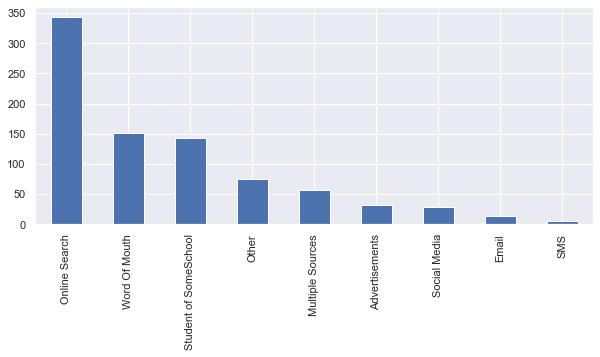

In [879]:
# Getting to know the course
plt.figure(figsize =(10,4))
(leads[(leads.Converted ==1) & (leads["How did you hear about X Education"] != "Select")])\
          ["How did you hear about X Education"].value_counts().plot(kind = "bar")
plt.show()

- It can be seen above that, Online search seems to be the most predominant way in which a person gets to know of the course (als seen earlier, where people google more to get to know of the course)
- Thus, the institute can safely reduce Advertisement spend and reduce on spam emails and SMS.

In [880]:
# drop the following columns: Asymmetrique Activity Index, Asymmetrique Profile Index, How did you hear about X Education, Tags, 
# Update me on Supply Chain Content, Get updates on DM Content, 

dropCols = ['Asymmetrique Profile Index', 'Asymmetrique Activity Index', \
            'Asymmetrique Profile Score', 'Asymmetrique Activity Score', \
            'Lead Profile', 'Lead Quality', \
           'How did you hear about X Education', 'Update me on Supply Chain Content', 'Get updates on DM Content', \
           'Lead Quality', 'Lead Profile', 'Tags']

leads = leads.drop(dropCols, axis = 1)
leads.shape

(9240, 27)

 - #### 2.2.2 Second set of columns to drop
     * We now check the boolean columns related to how the lead found out about the website

In [881]:
print(leads.Newspaper.value_counts())
print(leads['Search'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads.Magazine.value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['Receive More Updates About Our Courses'].value_counts())

0    9239
1       1
Name: Newspaper, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9240
Name: Magazine, dtype: int64
0    9239
1       1
Name: X Education Forums, dtype: int64
0    9236
1       4
Name: Digital Advertisement, dtype: int64
0    9233
1       7
Name: Through Recommendations, dtype: int64
0    9240
Name: Receive More Updates About Our Courses, dtype: int64


* From the above, we can observe the following:
    1. `Newspaper`, `Newspaper Article`, `Magazine`, `X Education Forums`, `Digital Advertisement`, `Through Recommendations` have so few 1 values that they don't give any useful data in deciding the outcome of **`Converted`**
    2. So, we can drop all these columns

In [882]:
dropCols = ['Newspaper', 'Newspaper Article', 'Magazine', 'X Education Forums', \
           'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Search']
leads = leads.drop(dropCols, axis = 1)
leads.shape

(9240, 19)

 - Similarly, we see high skewness in the columns `Do Not Call` and `Do Not Email` as well

In [883]:
print(leads['Do Not Call'].value_counts())
print(leads['Do Not Email'].value_counts())
print(leads['Do Not Email'].value_counts(normalize = True))
print(leads.Converted.value_counts())
print(leads['Do Not Email'].value_counts()[1]/leads.Converted.value_counts()[1])
print(leads['Do Not Call'].value_counts()[1]/leads.Converted.value_counts()[1])

0    9238
1       2
Name: Do Not Call, dtype: int64
0    8506
1     734
Name: Do Not Email, dtype: int64
0    0.920563
1    0.079437
Name: Do Not Email, dtype: float64
0    5679
1    3561
Name: Converted, dtype: int64
0.20612187587756248
0.0005616399887672002


1. Here again, `Do Not Call` has only 0 as its value except for 2 rows. So this does not have any bearing on the outcome either, since it does not show any variation
2. `Do Not Email`, however, is not as straightforward. Even though only 734 columns have 1, that forms 20% of the values which had `Converted` = 1. 
3. Still, overall, if seen, it has only 7% values that show any variation and would not be vary useful, given its skew
4. So, both these columns can be dropped due to their highly **skewed** nature

In [884]:
leads = leads.drop(['Do Not Call', 'Do Not Email'], axis = 1)

In [885]:
null_pct = round(leads.isnull().sum()*100/leads.shape[0], 2)
print(null_pct)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
City                                             39.71
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64


## 3.0 EDA and further data cleaning

In [886]:
leads.Country.value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
South Africa            0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
Ghana                   0.000295
Belgium                 0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Netherlands             0.000295
Uganda                  0.000295
Italy                   0.000295
Bangladesh              0.000295
Malaysia                0.000148
Vietnam                 0.000148
Denmark   

 - ### 3.1 Observations on 'Country'
* If we observe country, the following can be gleaned:
    1. Most of the entries (95%) are 'India'
    2. This means that this column has very little variation and hence, not much can be obtained from this column
    3. There are so many countries with just 1 lead
    4. Overall, this column doesn't seem to be very useful and we can drop this column
    
* Now, let's plot only the **non-India** countries and check how many people have converted from these countries

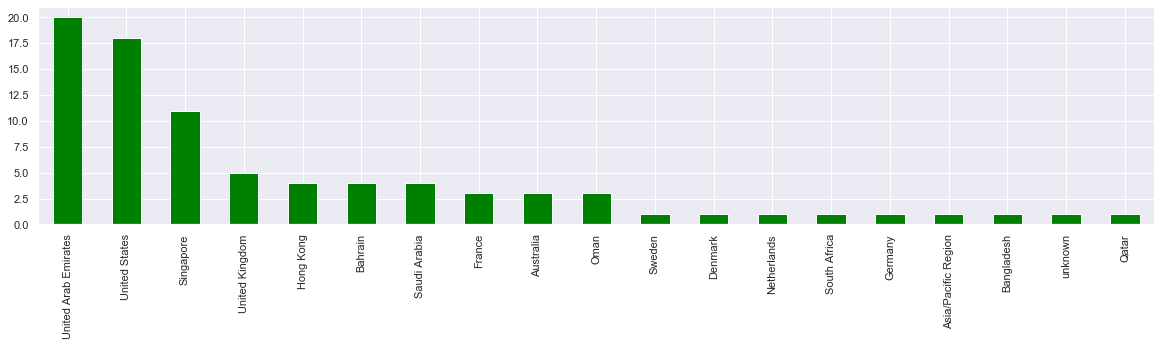

In [887]:
# Non Indian Countries Comparison
plt.figure(figsize = (20,4))
(leads[(leads.Converted == 1) & (leads.Country != "India")]).sort_values(["Country"], \
        ascending = False)["Country"].value_counts().plot(kind = "bar", color = 'green')
plt.show()

- From above we can infer that, English speaking countries and countries where Indians have migrated most, have subscribed for the course.

- Possibly, the low values of other countries, seem to to suggest that, there is'nt sufficient English speaking population to subscribe for a course based in English.

- Suggest that the course be offered in other foreign languages as well, to boost up subscription and revenue.

- Given that, there is very low foreign subscription(even English speaking countries), the course provider could partner with Education services providers in various countries.



In [888]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- From the above, we can safely say that we can impute the remaining rows in the column **What matters most to you in choosing a course** with **Better Career Prospects**, since almost all values are **Better Career Prospects** 
- After this, we will still find that almost all values would be **Better Career Prospects**
- Again, due to lack of variation, we can drop this column as well

In [889]:
dropCols = ['Country', 'What matters most to you in choosing a course']
leads = leads.drop(dropCols, axis = 1)

* Let's check the column 'I agree to pay the amount through cheque'

In [890]:
leads['I agree to pay the amount through cheque'].value_counts()

0    9240
Name: I agree to pay the amount through cheque, dtype: int64

* We can see that there is absolutely no variation in `I agree to pay the amount through cheque`
* So, this will not contribute anything to predicting the probability of conversion
* So, we drop this column

In [891]:
leads = leads.drop('I agree to pay the amount through cheque', axis = 1)

* Let's now recheck the situation of null values and also no. of columns present

In [892]:
nullColsPct = round(leads.isnull().sum()*100/leads.shape[0], 2)
print(nullColsPct)
print(f'No. of Cols present = {leads.shape}')

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64
No. of Cols present = (9240, 14)


**Rows that contain many nulls**:
- If there are rows that contain > 50% of the columns as nulls, we can drop them, since they won't contribute much, due their high number of nulls
- We check the no. of columns that have > 7 nulls in them (since we have 14 columns totally)

In [893]:
nullRows = leads.isnull().sum(axis = 1)
len(nullRows)
nullRows
sumNulls = 0
for i in range(len(nullRows)):
    if(nullRows[i] >= 7):
        sumNulls += 1
print(sumNulls)

0


- We find that there are 0 rows that have >= 7 nulls
- So, we can't delete any row based on this metric

### 2.1.3 Columns with higher null percentage

 * From the remaining columns, we now look at columns that have higher null percentage and decide whether to impute them or drop those columns
 * Since we need a fair number of categorical columns that have good variability in data, the decision is sometimees to keep the columns
 * To this end, we first look at `Specialization`

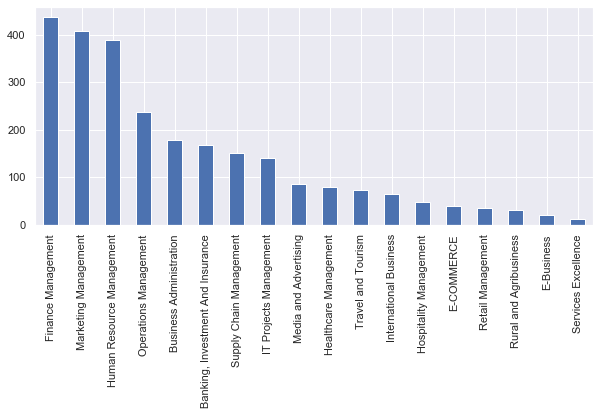

In [894]:
# Specialization and Course Aspiration
plt.figure(figsize =(10,4))
(leads[(leads.Converted ==1) & (leads.Specialization != "Select")])["Specialization"].\
        value_counts().plot(kind = "bar")
plt.show()

**Specialization**:
   - We can pretty much conclude from above that, the course is generally preferred by people in "Management" stream.
   - We can see that `Specialization` has no value really dominating the distribution
   - The no. of null values is 3380 or 36%
   - There are 2 issues with this column
       1. There are too many null values and imputing so many or deleting that many rows is not advisible
       2. Since there is no dominating value in this column, it's impossible to do mode-based imputation
   - Considering these 2 issues, it is decided to drop `Specialization`

In [895]:
leads = leads.drop('Specialization', axis = 1)

**Current Occupation**:
- If we observe the value counts of Occupation, we find that 'Unemployed' by far outweighs the other occupations
- Further, the next highest is only 10% of the total values
- So, we can safely impute all the null values with 'Unemployed'

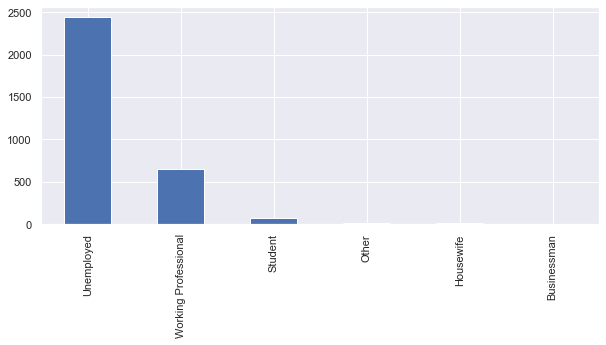

In [896]:
# Occupation
plt.figure(figsize =(10,4))
(leads[(leads.Converted ==1)])["What is your current occupation"].value_counts().plot(kind = "bar")
plt.show()

- Since Unemployed persons for the majority who tend to go for the course, it would be a good idea to advertise in Jobsearch portals and participate in job fairs

In [897]:
print(leads['What is your current occupation'].value_counts())
print(leads['What is your current occupation'].value_counts(normalize = True))
leads['What is your current occupation'].fillna(value = 'Unemployed', inplace = True)
print(f"Num of Null Values after impuation = {leads['What is your current occupation'].isnull().sum()}")

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64
Num of Null Values after impuation = 0


**City**:
- Even here, we see that **Mumbai** outweighs other values by a large amount
- Even though we could possibly impute the null values by Mumbai, it might not be right, since the no. of null values is > the no. of values of Mumbai
- We could impute using proportion, but the problem again is, the other values are far smaller than Mumbai
- Given this situation, it was finally decided to simply drop this column since 
    1. Variability is very low (column is highly **skewed**)
    2. The percentage of null values is very high

In [898]:
leads = leads.drop('City', axis = 1)

In [899]:
nullColsPct = round(leads.isnull().sum()*100/leads.shape[0], 2)
print(nullColsPct)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64


**Last Activity**:
- We note that `Last Activity` has 1.11% nulls
- Further, on checking the value counts of this column, we se that values dwindle fast, starting from 'Unsubscribed'
- We can combine all these to a collective category and name it 'Others'
- After this, we just impute the Null Values in this column with the mode of this column, i.e., 'Email Opened'

In [900]:
vals = leads['Last Activity'].value_counts()
print(vals)
leads['Last Activity'].value_counts(normalize = True)
to_replace = vals.index[9:]
leads.replace(to_replace, 'Others', inplace = True)
leads['Last Activity'].value_counts()
leads['Last Activity'].fillna(value = 'Email Opened', inplace = True)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


* `Prospect ID` can be removed, in favour of keeping Lead Number, since both these act as ids 

In [901]:
leads.drop('Prospect ID', axis = 1, inplace = True)
print(leads.shape)
leads.head()

(9240, 11)


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


**Lead Origin**:
- This is a column that contains 5 unique entries
- Observing these, it is decided to club 'Lead Add Form', 'Lead Import' and 'Quick Add Form' to 'Others'
- This will help reduce the number of columns after dummy variable creation too

In [902]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [903]:
vals = leads['Lead Origin'].value_counts(normalize = True)
to_replace = vals.index[2:]
print(to_replace)
leads.replace(to_replace, 'Others', inplace = True)
leads['Lead Origin'].value_counts(normalize = True)

Index(['Lead Add Form', 'Lead Import', 'Quick Add Form'], dtype='object')


Landing Page Submission    0.528788
API                        0.387446
Others                     0.083766
Name: Lead Origin, dtype: float64

**Lead Source**:
- Here again, we see that starting with **Welingak Website**, all entries contribute very low percentages to the column
- Again, all these can be clubbed to a single category, 'Others'

In [904]:
print(leads['Lead Source'].value_counts(normalize = True))

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Press_Release        0.000217
Live Chat            0.000217
welearnblog_Home     0.000109
youtubechannel       0.000109
NC_EDM               0.000109
testone              0.000109
WeLearn              0.000109
blog                 0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64


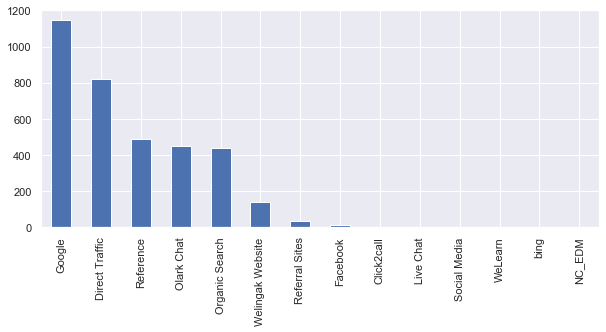

In [905]:
# Source of Leads
plt.figure(figsize =(10,4))
(leads[(leads.Converted == 1)])["Lead Source"].value_counts().plot(kind = "bar")
plt.show()

- From above plot, we can infer that spending on Google-ads, could increase visits
- Further advertising on TV and other media could also help, since we see a significant amount of direct traffic
- We also see that the number of people reduce drastically, starting with **Wellingak Website**. So, the idea is to combine these smaller values into Others

In [906]:
vals = leads['Lead Source'].value_counts(normalize = True)
to_replace = vals.index[4:]
leads.replace(to_replace, 'Others', inplace = True)
leads['Lead Source'].fillna(value = 'Google', inplace = True)
print(leads['Lead Source'].value_counts(normalize = True))

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.095671
Name: Lead Source, dtype: float64


**Total Visits and Page Views Per Visit**:
- Finally, we see that the 2 numeric columns, `Total Visits` and `Page Views Per Visit` have 1.48% null values
- These are simply imputed with the means of these columns, since the %age is very low

**Last Notable Activity**

In [907]:
leads = leads.drop('Last Notable Activity', axis = 1)

* Here, it would not be wise to combine the lower-end unique entries into Others, since it has already been done

In [908]:
leads.fillna(leads.mean(), inplace = True)
nullColsPct = round(leads.isnull().sum()*100/leads.shape[0], 2)
print(nullColsPct)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


In [1009]:
nullRowsPct = (leads.shape[0]*100/orig_shape[0])
print(nullRowsPct)
print(leads.shape)

100.0
(9240, 24)


- **No row is deleted and so 100% of the rows are retained.**
- 24 columns are retained

In [909]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,0.312554
std,23405.995698,0.486714,4.818723,548.021466,2.145333,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,1.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


* We see, from the above that the mean has not changed at all, for these 2 columns
* The variance has changed a small amount (in the 3rd decimal place), which would hardly have any effect

- After clamping, the extreme outliers in these 2 columns have been removed

## 3.0 Create Dummy Variables
- This is an important step in Logistic Regression
- Here, we convert all the **text** column-values to binary values by creating multiple columns for each unique value
- We carefully keep monitoring the number of columns as well

### 3.1 Lead Origin

In [910]:
# Create dummies of Lead Origin and concatenate it with the main dataset
# Then, drop the column 'Lead Origin', since dummies have already been created for this column
lead_orig = pd.get_dummies(leads['Lead Origin'], prefix = 'LeadOrigin', drop_first = True)
lead_orig.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Others
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [911]:
leads = pd.concat([leads, lead_orig], axis = 1)
leads = leads.drop(['Lead Origin'], axis = 1)

### 3.2 Lead Source

In [912]:
# Create dummies of Lead Source and concatenate it with the main dataset
# Then, drop the column 'Lead Source', since dummies have already been created for this column
lead_source = pd.get_dummies(leads['Lead Source'], prefix = 'LeadSource', drop_first = True)
lead_source.head()

,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others
0,0,1,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0


In [913]:
leads = pd.concat([leads, lead_source], axis = 1)
leads = leads.drop(['Lead Source'], axis = 1)

### 3.3 Last Activity

In [914]:
# Create dummies of Last Activity and concatenate it with the main dataset
# Then, drop the column 'Last Activity', since dummies have already been created for this column
lastActivity = pd.get_dummies(leads['Last Activity'], prefix = 'LastActivity', drop_first = True)
lastActivity.head()

,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable
0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0


In [915]:
leads = pd.concat([leads, lastActivity], axis = 1)
leads = leads.drop(['Last Activity'], axis = 1)

### 3.4 Occupation

In [916]:
# Create dummies of 'What is your current occupation' and concatenate it with the main dataset
# Then, drop the column 'What is your current occupation', since dummies have already been created for this column
occupation = pd.get_dummies(leads['What is your current occupation'], prefix = 'Occupation', drop_first = True)
occupation.head()

,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [917]:
leads = pd.concat([leads, occupation], axis = 1)
leads = leads.drop(['What is your current occupation'], axis = 1)

In [918]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Others,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [919]:
leads.shape

(9240, 26)

Finally, we haven 26 columns, with no rows being deleted

In [920]:
leads = leads.set_index('Lead Number')

In [921]:
y = leads.pop('Converted')
X = leads
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [922]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Others,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
660728,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
660727,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
660719,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
660681,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 3.5 EDA of Numeric Columns

- We now analyze the spread of values of numeric columns using box plots
- We plot box plots for
    1. TotalVisits
    2. Total Time Spent on Website
    3. Page Views Per Visit
    
- We use log-scale for `TotalVisits` and `Page Views Per Visit` since the dynamic range is too high

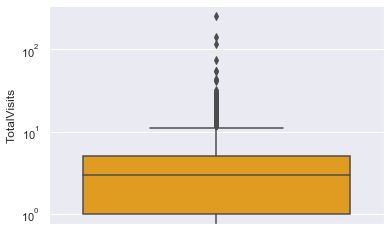

In [923]:
sns.boxplot(leads.TotalVisits, orient= 'v', color = 'orange')
plt.yscale('log')
plt.show()

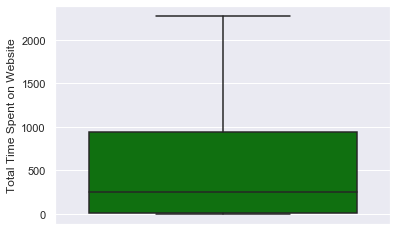

In [924]:
sns.boxplot(leads['Total Time Spent on Website'], orient = 'v', color = 'green')
plt.show()

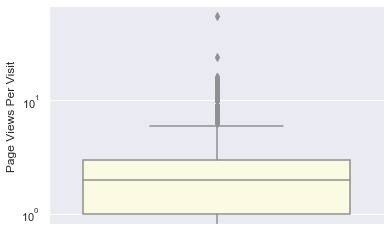

In [925]:
sns.boxplot(leads['Page Views Per Visit'], orient = 'v', color = 'lightyellow')
plt.yscale('log')
plt.show()

#### Observations:
We can observe the following:
1. There is a high dynamic range in the columns `Page Views Per Visit` and `TotalVisits`
2. There are clear **outliers** in these 2 columns
3. So, it is decided to cap the higher end of these 2 columns at 99%

In [926]:
q4 = leads.TotalVisits.quantile(0.99)
leads.TotalVisits[leads.TotalVisits >= q4] = q4

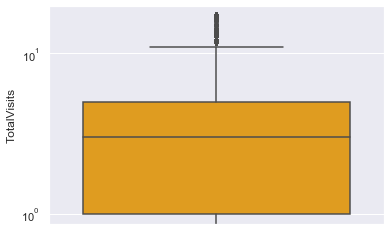

In [927]:
sns.boxplot(leads.TotalVisits, orient= 'v', color = 'orange')
plt.yscale('log')
plt.show()

In [928]:
q4 = leads['Page Views Per Visit'].quantile(0.99)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= q4] = q4

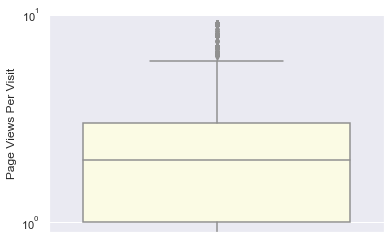

In [929]:
sns.boxplot(leads['Page Views Per Visit'], orient= 'v', color = 'lightyellow')
plt.yscale('log')
plt.show()

- After clamping, the extreme outliers in these 2 columns have been removed

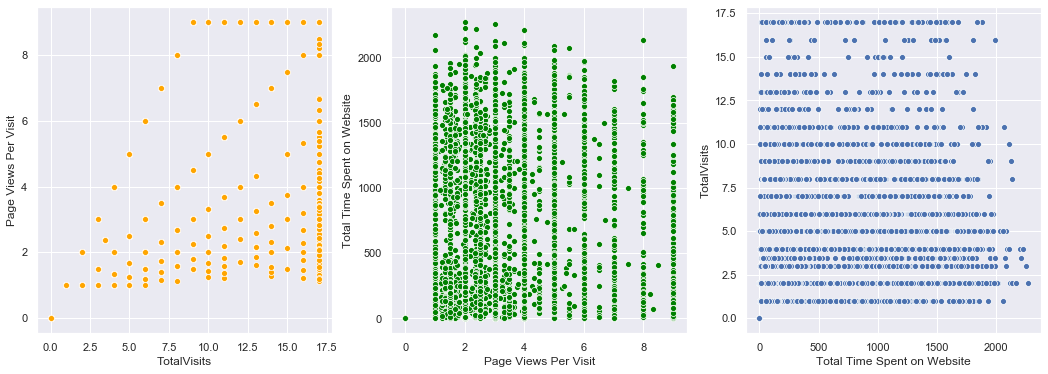

In [930]:
fig, axs = plt.subplots(1, 3, figsize = (18, 6))

sns.scatterplot(x = 'TotalVisits', y = 'Page Views Per Visit', data = leads, ax = axs[0], color = 'orange')

sns.scatterplot(x = 'Page Views Per Visit', y = 'Total Time Spent on Website', data = leads, ax = axs[1], color = 'green')

sns.scatterplot(x = 'Total Time Spent on Website', y = 'TotalVisits', data = leads, ax = axs[2])

plt.show()

* We can see from the above, that `TotalVisits` and `Page Views Per Visit` appear to be linearly dependent
* We will check the correlation between these 2 variables and drop one of them, if it is high

In [931]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 24)
(2772, 24)
(6468,)
(2772,)


In [932]:
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Others,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,1.682156e-18,-1.609377e-16,3.011746e-16,0.311843,0.528139,0.084725,0.320037,0.190167,0.121058,0.097248,0.036333,0.028293,0.381262,0.012678,0.102195,0.011905,0.072047,0.300402,0.008813,0.001391,0.001237,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.278493,0.466527,0.392463,0.326219,0.296318,0.187131,0.165822,0.485734,0.111888,0.302929,0.108466,0.258586,0.458468,0.093468,0.037279,0.035150,0.143484,0.302929,0.267582
min,-1.024760e+00,-8.853708e-01,-1.183540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.177464e-01,-8.634138e-01,-6.743435e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.037183e-01,-4.352528e-01,-1.651471e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.103098e-01,8.098906e-01,3.440493e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.194478e+00,3.271816e+00,3.399228e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.0 Correlation

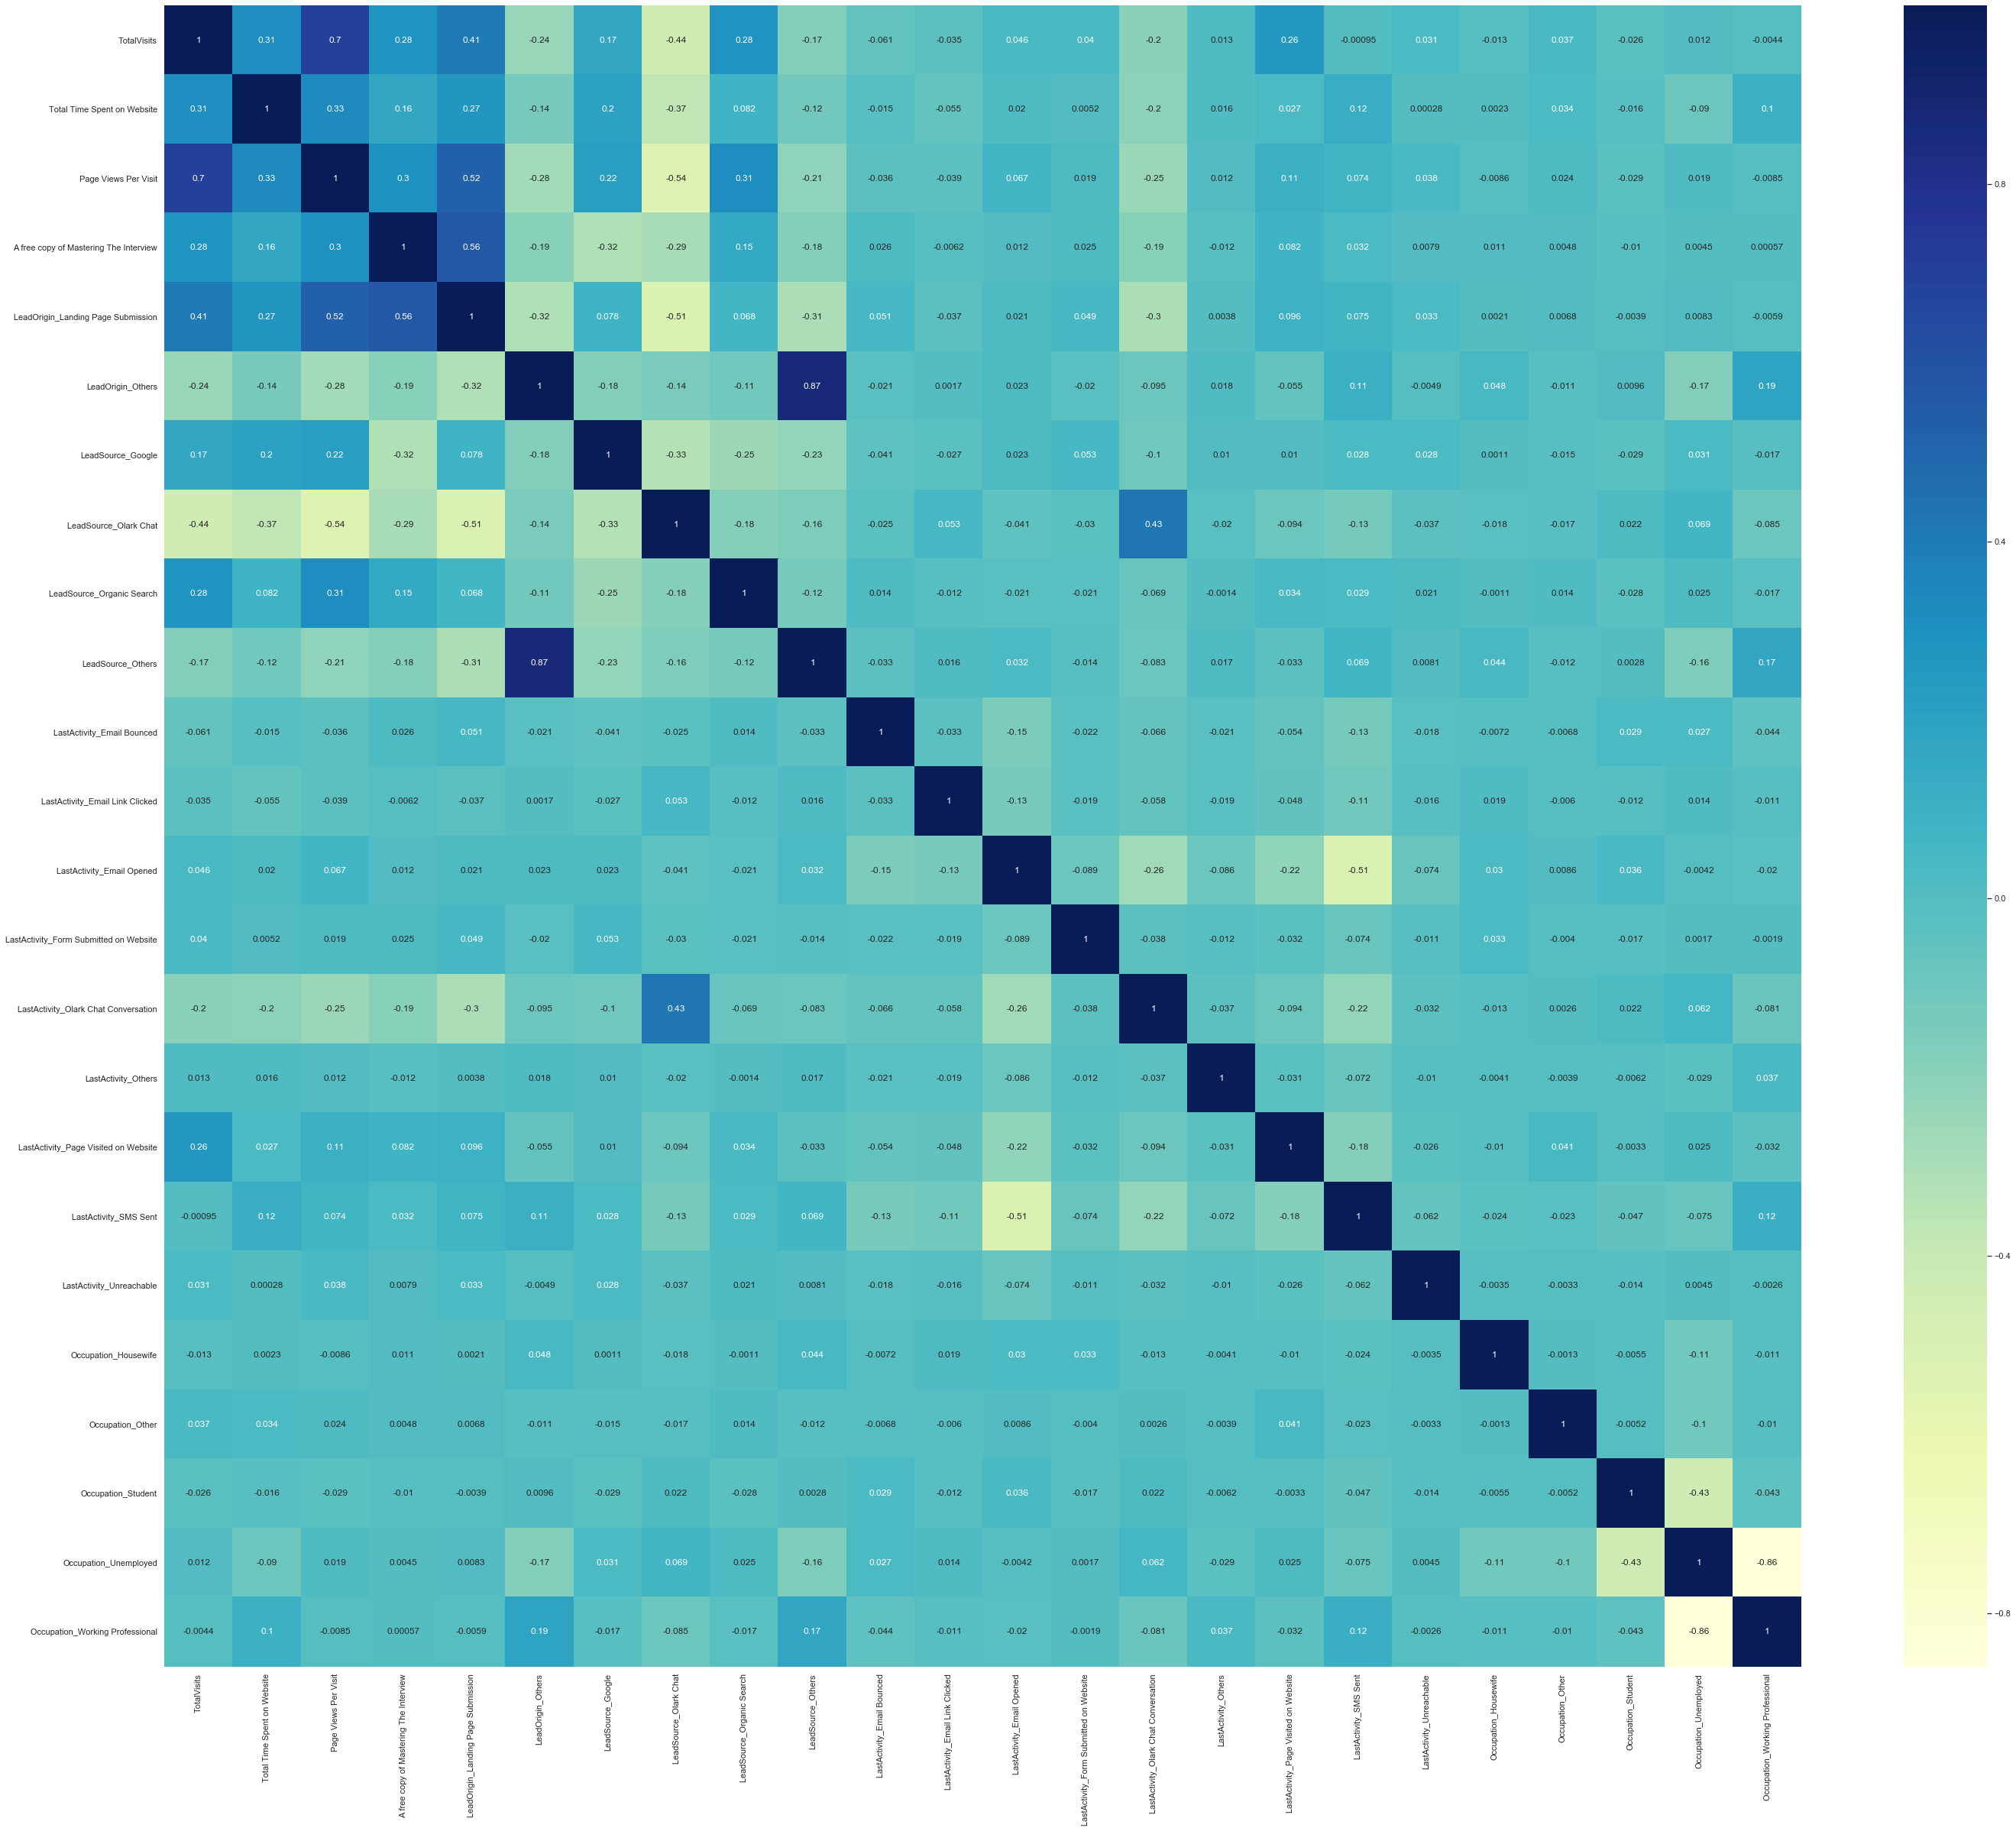

In [933]:
plt.figure(figsize = (48, 40))
ax = sns.heatmap(X_train.corr(), annot = True, cmap = 'YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 4.1 Observations:
* We can observe the following from the above:

1. Most of the columns do not show very high correlation among themselves
2. `Page Views Per Visit` and `TotalVisits` have a high correlation of 0.7. We saw this linear dependance durig EDA as well
3. Similarly, `LeadOrigin_Others` and `LeadSource_Others` are also highly correlated (0.87)

* So, we will drop the columns `Page Views Per Visit` and `LeadOrigin_Others`

In [934]:
X_train = X_train.drop(['Page Views Per Visit', 'LeadSource_Others'], axis = 1)

## 5.0 Logistic Regression

### 5.1 Modeling using RFE

* We first use RFE to reduce the number of columns to 20 by choosing the 20 most relevant colums using RFE
* Post this, we analyze the parameters (P-value and VIF) of the columns and decide to keep them or drop them
* We finally reduce the total number of columns to something <= 15 with the p-values showing significance and VIF being low

In [935]:
leads.shape

(9240, 24)

In [936]:
from sklearn.linear_model import LogisticRegression

In [937]:
logreg = LogisticRegression()

In [938]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [939]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [940]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 2),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Others', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 3),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', True, 1),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', True, 1),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Others', True, 1),
 ('LastActivity_Page Visited on Website', True, 1),
 ('LastActivity_SMS Sent', True, 1),
 ('LastActivity_Unreachable', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1)]

In [941]:
col = X_train.columns[rfe.support_]

In [942]:
rfe_drop_cols = X_train.columns[~rfe.support_]

In [943]:
X_train = X_train.drop(rfe_drop_cols, axis = 1)
X_test = X_test.drop(rfe_drop_cols, axis = 1)

In [944]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.6
Date:                Mon, 07 Sep 2020   Deviance:                       5563.2
Time:                        21:15:43   Pearson chi2:                 7.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9566      1.124     -1.741      0.082      -4.159       0.246
TotalVisits                                0.2023      0.041      4.956      0.000       0.122       0.282
Total Time Spent on Website                1.0723      0.039     27.533      0.000       0.996       1.149
LeadOrigin_Landing Page Submission        -0.2761      0.091     -3.029      0.002      -0.455      -0.097
LeadOrigin_Others                          3.4229      0.176     19.417      0.000       3.077       3.768
LeadSource_Google                          0.2751      0.080      3.453      0.001       0.119       0.431
LeadSource_Olark Chat                      1.3149      0.138      9.544      0.000       1.045       1.585
LastActivity_Email Bounced                -0.7763      0.361     -2.151      0.031      -1.484      -0.069
LastActivity_Email Link Clicked            0.6778      0.300      2.256      0.024       0.089       1.267
LastActivity_Email Opened                  1.1625      0.222      5.233      0.000       0.727       1.598
LastActivity_Form Submitted on Website     0.4297      0.399      1.078      0.281      -0.352       1.211
LastActivity_Olark Chat Conversation      -0.3777      0.270     -1.400      0.161      -0.906       0.151
LastActivity_Others                        1.5779      0.364      4.335      0.000       0.865       2.291
LastActivity_Page Visited on Website       0.4191      0.259      1.616      0.106      -0.089       0.927
LastActivity_SMS Sent                      2.2616      0.223     10.152      0.000       1.825       2.698
LastActivity_Unreachable                   1.2287      0.407      3.016      0.003       0.430       2.027
Occupation_Housewife                      22.6822   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
Occupation_Other                          -0.4649      1.361     -0.342      0.733      -3.132       2.202
Occupation_Student                        -0.0821      1.126     -0.073      0.942      -2.289       2.125
Occupation_Unemployed                     -0.5292      1.103     -0.480      0.631      -2.692       1.633
Occupation_Working Professional            2.3647      1.118      2.115      0.034       0.173       4.556
==========================================================================================================
"""

We observe that:
  - Occupation_Housewife, Occupation_Student, Occupation_Unemployed, Occupation_Other, LastActivity_Form Submitted on Website, LastActivity_Olark Chat Conversation and LastActivity_Olark Chat Conversation are all insignificant
  - However, the one with the highest value is Occupation_Housewife
  - So, we delete this column first

In [945]:
X_train = X_train.drop('Occupation_Housewife', axis = 1)

In [946]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.7
Date:                Mon, 07 Sep 2020   Deviance:                       5569.5
Time:                        21:15:43   Pearson chi2:                 7.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2141      0.788     -0.272      0.786      -1.759       1.331
TotalVisits                                0.1998      0.041      4.896      0.000       0.120       0.280
Total Time Spent on Website                1.0717      0.039     27.520      0.000       0.995       1.148
LeadOrigin_Landing Page Submission        -0.2696      0.091     -2.959      0.003      -0.448      -0.091
LeadOrigin_Others                          3.4228      0.176     19.422      0.000       3.077       3.768
LeadSource_Google                          0.2764      0.080      3.472      0.001       0.120       0.432
LeadSource_Olark Chat                      1.3140      0.138      9.540      0.000       1.044       1.584
LastActivity_Email Bounced                -0.7750      0.361     -2.148      0.032      -1.482      -0.068
LastActivity_Email Link Clicked            0.6824      0.300      2.274      0.023       0.094       1.271
LastActivity_Email Opened                  1.1664      0.222      5.252      0.000       0.731       1.602
LastActivity_Form Submitted on Website     0.4234      0.396      1.070      0.285      -0.352       1.199
LastActivity_Olark Chat Conversation      -0.3807      0.270     -1.411      0.158      -0.909       0.148
LastActivity_Others                        1.5795      0.364      4.341      0.000       0.866       2.293
LastActivity_Page Visited on Website       0.4157      0.259      1.603      0.109      -0.093       0.924
LastActivity_SMS Sent                      2.2625      0.223     10.157      0.000       1.826       2.699
LastActivity_Unreachable                   1.2098      0.410      2.949      0.003       0.406       2.014
Occupation_Other                          -2.2091      1.099     -2.010      0.044      -4.363      -0.055
Occupation_Student                        -1.8305      0.788     -2.324      0.020      -3.374      -0.287
Occupation_Unemployed                     -2.2768      0.755     -3.015      0.003      -3.757      -0.797
Occupation_Working Professional            0.6161      0.776      0.794      0.427      -0.904       2.137
==========================================================================================================
"""

- Out of the remaining, the highest p-value is exhibited by Occupation_Working Professional and we delete that next

In [947]:
X_train = X_train.drop('Occupation_Working Professional', axis = 1)

In [948]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.0
Date:                Mon, 07 Sep 2020   Deviance:                       5570.1
Time:                        21:15:44   Pearson chi2:                 7.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3744      0.278      1.346      0.178      -0.171       0.919
TotalVisits                                0.1996      0.041      4.892      0.000       0.120       0.280
Total Time Spent on Website                1.0719      0.039     27.525      0.000       0.996       1.148
LeadOrigin_Landing Page Submission        -0.2694      0.091     -2.956      0.003      -0.448      -0.091
LeadOrigin_Others                          3.4224      0.176     19.419      0.000       3.077       3.768
LeadSource_Google                          0.2764      0.080      3.472      0.001       0.120       0.432
LeadSource_Olark Chat                      1.3144      0.138      9.544      0.000       1.044       1.584
LastActivity_Email Bounced                -0.7762      0.360     -2.153      0.031      -1.483      -0.070
LastActivity_Email Link Clicked            0.6792      0.300      2.265      0.024       0.091       1.267
LastActivity_Email Opened                  1.1631      0.222      5.245      0.000       0.728       1.598
LastActivity_Form Submitted on Website     0.3956      0.396      0.998      0.318      -0.381       1.172
LastActivity_Olark Chat Conversation      -0.3864      0.269     -1.434      0.152      -0.915       0.142
LastActivity_Others                        1.5778      0.364      4.340      0.000       0.865       2.290
LastActivity_Page Visited on Website       0.4114      0.259      1.588      0.112      -0.096       0.919
LastActivity_SMS Sent                      2.2599      0.222     10.160      0.000       1.824       2.696
LastActivity_Unreachable                   1.2050      0.410      2.936      0.003       0.401       2.009
Occupation_Other                          -2.7940      0.819     -3.410      0.001      -4.400      -1.188
Occupation_Student                        -2.4158      0.288     -8.383      0.000      -2.981      -1.851
Occupation_Unemployed                     -2.8622      0.182    -15.763      0.000      -3.218      -2.506
==========================================================================================================
"""

* We now delete LastActivity_Form Submitted on Website since it has a high p-value

In [949]:
X_train = X_train.drop('LastActivity_Form Submitted on Website', axis = 1)

In [950]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.5
Date:                Mon, 07 Sep 2020   Deviance:                       5571.0
Time:                        21:15:44   Pearson chi2:                 7.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.4812      0.254      1.897      0.058      -0.016       0.978
TotalVisits                              0.2035      0.041      5.007      0.000       0.124       0.283
Total Time Spent on Website              1.0722      0.039     27.537      0.000       0.996       1.149
LeadOrigin_Landing Page Submission      -0.2668      0.091     -2.930      0.003      -0.445      -0.088
LeadOrigin_Others                        3.4334      0.176     19.514      0.000       3.089       3.778
LeadSource_Google                        0.2797      0.080      3.516      0.000       0.124       0.436
LeadSource_Olark Chat                    1.3260      0.137      9.661      0.000       1.057       1.595
LastActivity_Email Bounced              -0.8863      0.341     -2.602      0.009      -1.554      -0.219
LastActivity_Email Link Clicked          0.5684      0.275      2.065      0.039       0.029       1.108
LastActivity_Email Opened                1.0524      0.187      5.622      0.000       0.685       1.419
LastActivity_Olark Chat Conversation    -0.4982      0.241     -2.063      0.039      -0.971      -0.025
LastActivity_Others                      1.4673      0.344      4.269      0.000       0.794       2.141
LastActivity_Page Visited on Website     0.2980      0.229      1.301      0.193      -0.151       0.747
LastActivity_SMS Sent                    2.1497      0.188     11.418      0.000       1.781       2.519
LastActivity_Unreachable                 1.0937      0.393      2.785      0.005       0.324       1.863
Occupation_Other                        -2.7961      0.820     -3.411      0.001      -4.403      -1.190
Occupation_Student                      -2.4193      0.288     -8.397      0.000      -2.984      -1.855
Occupation_Unemployed                   -2.8641      0.182    -15.774      0.000      -3.220      -2.508
========================================================================================================
"""

Continuing on, we delete all columns that have high p-value

In [951]:
X_train = X_train.drop('LastActivity_Page Visited on Website', axis = 1)

In [952]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.4
Date:                Mon, 07 Sep 2020   Deviance:                       5572.7
Time:                        21:15:44   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.6490      0.217      2.994      0.003       0.224       1.074
TotalVisits                              0.2163      0.039      5.478      0.000       0.139       0.294
Total Time Spent on Website              1.0724      0.039     27.547      0.000       0.996       1.149
LeadOrigin_Landing Page Submission      -0.2668      0.091     -2.933      0.003      -0.445      -0.088
LeadOrigin_Others                        3.4524      0.175     19.683      0.000       3.109       3.796
LeadSource_Google                        0.2811      0.080      3.535      0.000       0.125       0.437
LeadSource_Olark Chat                    1.3452      0.137      9.851      0.000       1.078       1.613
LastActivity_Email Bounced              -1.0652      0.310     -3.433      0.001      -1.673      -0.457
LastActivity_Email Link Clicked          0.3874      0.235      1.646      0.100      -0.074       0.848
LastActivity_Email Opened                0.8703      0.120      7.250      0.000       0.635       1.106
LastActivity_Olark Chat Conversation    -0.6813      0.194     -3.519      0.000      -1.061      -0.302
LastActivity_Others                      1.2858      0.312      4.115      0.000       0.673       1.898
LastActivity_SMS Sent                    1.9691      0.123     16.024      0.000       1.728       2.210
LastActivity_Unreachable                 0.9101      0.365      2.492      0.013       0.194       1.626
Occupation_Other                        -2.7576      0.821     -3.360      0.001      -4.366      -1.149
Occupation_Student                      -2.4064      0.288     -8.366      0.000      -2.970      -1.843
Occupation_Unemployed                   -2.8560      0.181    -15.764      0.000      -3.211      -2.501
========================================================================================================
"""

In [953]:
X_train = X_train.drop('LastActivity_Email Link Clicked', axis = 1)

In [954]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.7
Date:                Mon, 07 Sep 2020   Deviance:                       5575.4
Time:                        21:15:44   Pearson chi2:                 7.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7220      0.212      3.414      0.001       0.307       1.137
TotalVisits                              0.2124      0.039      5.399      0.000       0.135       0.289
Total Time Spent on Website              1.0706      0.039     27.543      0.000       0.994       1.147
LeadOrigin_Landing Page Submission      -0.2665      0.091     -2.932      0.003      -0.445      -0.088
LeadOrigin_Others                        3.4611      0.175     19.722      0.000       3.117       3.805
LeadSource_Google                        0.2815      0.079      3.544      0.000       0.126       0.437
LeadSource_Olark Chat                    1.3541      0.136      9.921      0.000       1.087       1.622
LastActivity_Email Bounced              -1.1447      0.306     -3.740      0.000      -1.745      -0.545
LastActivity_Email Opened                0.7913      0.109      7.282      0.000       0.578       1.004
LastActivity_Olark Chat Conversation    -0.7664      0.186     -4.123      0.000      -1.131      -0.402
LastActivity_Others                      1.2078      0.308      3.918      0.000       0.604       1.812
LastActivity_SMS Sent                    1.8903      0.112     16.916      0.000       1.671       2.109
LastActivity_Unreachable                 0.8337      0.362      2.305      0.021       0.125       1.543
Occupation_Other                        -2.7712      0.820     -3.381      0.001      -4.378      -1.165
Occupation_Student                      -2.4064      0.288     -8.369      0.000      -2.970      -1.843
Occupation_Unemployed                   -2.8520      0.181    -15.771      0.000      -3.206      -2.498
========================================================================================================
"""

In [955]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,Occupation_Unemployed,6.31
2,LeadOrigin_Landing Page Submission,3.25
7,LastActivity_Email Opened,2.91
5,LeadSource_Olark Chat,2.73
10,LastActivity_SMS Sent,2.50
8,LastActivity_Olark Chat Conversation,1.81
4,LeadSource_Google,1.74
3,LeadOrigin_Others,1.54
0,TotalVisits,1.45
1,Total Time Spent on Website,1.26


* The VIF of `Occupation_Unemployed` is high, so we delete that next

In [956]:
X_train = X_train.drop('Occupation_Unemployed', axis = 1)

In [957]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.3
Date:                Mon, 07 Sep 2020   Deviance:                       5964.6
Time:                        21:15:44   Pearson chi2:                 6.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9389      0.122    -15.891      0.000      -2.178      -1.700
TotalVisits                              0.1934      0.038      5.119      0.000       0.119       0.267
Total Time Spent on Website              1.0946      0.038     28.922      0.000       1.020       1.169
LeadOrigin_Landing Page Submission      -0.1957      0.088     -2.234      0.026      -0.367      -0.024
LeadOrigin_Others                        3.6585      0.171     21.434      0.000       3.324       3.993
LeadSource_Google                        0.2749      0.076      3.598      0.000       0.125       0.425
LeadSource_Olark Chat                    1.3242      0.132     10.038      0.000       1.066       1.583
LastActivity_Email Bounced              -1.2439      0.301     -4.137      0.000      -1.833      -0.655
LastActivity_Email Opened                0.7396      0.103      7.187      0.000       0.538       0.941
LastActivity_Olark Chat Conversation    -0.8312      0.179     -4.647      0.000      -1.182      -0.481
LastActivity_Others                      1.2881      0.288      4.477      0.000       0.724       1.852
LastActivity_SMS Sent                    1.8325      0.106     17.303      0.000       1.625       2.040
LastActivity_Unreachable                 0.7322      0.347      2.108      0.035       0.051       1.413
Occupation_Other                        -0.1287      0.802     -0.161      0.872      -1.700       1.443
Occupation_Student                       0.2610      0.231      1.130      0.258      -0.192       0.714
========================================================================================================
"""

In [958]:
X_train = X_train.drop('Occupation_Other', axis = 1)

In [959]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.3
Date:                Mon, 07 Sep 2020   Deviance:                       5964.7
Time:                        21:15:44   Pearson chi2:                 6.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9396      0.122    -15.905      0.000      -2.179      -1.701
TotalVisits                              0.1932      0.038      5.116      0.000       0.119       0.267
Total Time Spent on Website              1.0945      0.038     28.932      0.000       1.020       1.169
LeadOrigin_Landing Page Submission      -0.1955      0.088     -2.232      0.026      -0.367      -0.024
LeadOrigin_Others                        3.6586      0.171     21.434      0.000       3.324       3.993
LeadSource_Google                        0.2752      0.076      3.605      0.000       0.126       0.425
LeadSource_Olark Chat                    1.3244      0.132     10.040      0.000       1.066       1.583
LastActivity_Email Bounced              -1.2434      0.301     -4.135      0.000      -1.833      -0.654
LastActivity_Email Opened                0.7398      0.103      7.189      0.000       0.538       0.942
LastActivity_Olark Chat Conversation    -0.8313      0.179     -4.648      0.000      -1.182      -0.481
LastActivity_Others                      1.2886      0.288      4.479      0.000       0.725       1.852
LastActivity_SMS Sent                    1.8330      0.106     17.312      0.000       1.625       2.040
LastActivity_Unreachable                 0.7326      0.347      2.109      0.035       0.052       1.413
Occupation_Student                       0.2612      0.231      1.131      0.258      -0.191       0.714
========================================================================================================
"""

In [960]:
X_train = X_train.drop('Occupation_Student', axis = 1)

In [961]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.0
Date:                Mon, 07 Sep 2020   Deviance:                       5965.9
Time:                        21:15:44   Pearson chi2:                 6.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9361      0.122    -15.888      0.000      -2.175      -1.697
TotalVisits                              0.1928      0.038      5.109      0.000       0.119       0.267
Total Time Spent on Website              1.0943      0.038     28.933      0.000       1.020       1.168
LeadOrigin_Landing Page Submission      -0.1941      0.088     -2.217      0.027      -0.366      -0.023
LeadOrigin_Others                        3.6610      0.171     21.452      0.000       3.326       3.995
LeadSource_Google                        0.2741      0.076      3.591      0.000       0.125       0.424
LeadSource_Olark Chat                    1.3266      0.132     10.059      0.000       1.068       1.585
LastActivity_Email Bounced              -1.2399      0.301     -4.121      0.000      -1.830      -0.650
LastActivity_Email Opened                0.7425      0.103      7.218      0.000       0.541       0.944
LastActivity_Olark Chat Conversation    -0.8287      0.179     -4.634      0.000      -1.179      -0.478
LastActivity_Others                      1.2877      0.288      4.473      0.000       0.723       1.852
LastActivity_SMS Sent                    1.8312      0.106     17.302      0.000       1.624       2.039
LastActivity_Unreachable                 0.7286      0.347      2.098      0.036       0.048       1.409
========================================================================================================
"""

* Since all the parameters are significant, we again check the VIF and proceed

In [962]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,LeadOrigin_Landing Page Submission,2.47
5,LeadSource_Olark Chat,2.35
7,LastActivity_Email Opened,2.34
10,LastActivity_SMS Sent,2.14
8,LastActivity_Olark Chat Conversation,1.61
4,LeadSource_Google,1.55
3,LeadOrigin_Others,1.47
0,TotalVisits,1.44
1,Total Time Spent on Website,1.25
6,LastActivity_Email Bounced,1.13


## 6.0 Predictions

**Data frame for final predictions**

The process followed here onwards, is as below:

1. Create a DF for holding the Lead id (Lead Number), the current Converted column that indicates if a particular lead has converted or not
2. Plot the ROC curve to find out if the area under the curve is good
4. Determine the Confusion Matrix
3. To find the optimal cutoff point, we plot the **Accuracy**, **Sensitivity** and **Specificity** against different probabilites from 0 to 1.0
4. The curves of these are then plotted. 
5. We take the point of intersection of the **Accuray**, **Sensitivity** and **Specificity** as the threshold for prediction
6. We then calculate the various metrics for the training set, like the above 3 metrics, Precision, Recall, PPR, FPR, etc.
7. Based on these values, we choose the model if it shows good **sensitivity**, since we want good prediction of converted cases
8. Finally, we multiply the `Conversion_prob` by 100 to get the Probability Score that can be used by sales to contact leads that can be easily converted

9. Carry out the same prediction on the test set and calculate the metrics using the Confusion matrix

In [963]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.262429
597687    0.207143
626825    0.371653
587928    0.827425
622366    0.262429
613574    0.855542
628456    0.122440
588051    0.938940
649586    0.195992
592598    0.909695
dtype: float64

In [964]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26242861, 0.20714309, 0.37165276, 0.82742456, 0.26242861,
       0.85554223, 0.12244039, 0.93893952, 0.1959918 , 0.90969525])

In [965]:
y_train_pred_fin = pd.DataFrame({'Converted': y_train.values, 'Conversion_prob': y_train_pred})
y_train_pred_fin['LeadID'] = y_train.index
y_train_pred_fin.head()

,Converted,Conversion_prob,LeadID
0,0,0.262429,641410
1,0,0.207143,597687
2,0,0.371653,626825
3,0,0.827425,587928
4,0,0.262429,622366


In [966]:
# TN   FP
# FN   TP

##  7.0 ROC Curve

In [967]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (= 1 - Specificity)')
    plt.ylabel('True Positive Rate (= Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [968]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_fin.Converted, \
                                         y_train_pred_fin.Conversion_prob, drop_intermediate = False )

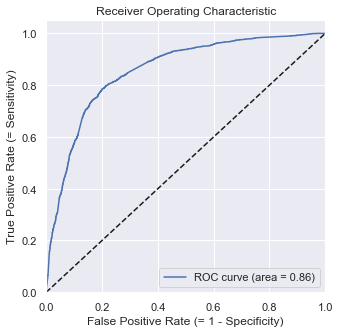

In [969]:
draw_roc(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_prob)

#### Observations

- This is a good ROC curve since it maximizes the sensitivity with specificity being somewhat reduced
- The area under the curve is also very good (0.88)
- Due to this, we can say that this is a good ROC curve

### 7.1 Finding the Optimal cutoff point

In [970]:
probs = [float(x)/10 for x in range(10)]
for prob in probs:
    y_train_pred_fin[prob] = y_train_pred_fin.Conversion_prob.map(lambda x: 1 if x > prob else 0)
y_train_pred_fin.head()

,Converted,Conversion_prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.262429,641410,1,1,1,0,0,0,0,0,0,0
1,0,0.207143,597687,1,1,1,0,0,0,0,0,0,0
2,0,0.371653,626825,1,1,1,1,0,0,0,0,0,0
3,0,0.827425,587928,1,1,1,1,1,1,1,1,1,0
4,0,0.262429,622366,1,1,1,0,0,0,0,0,0,0


In [971]:
cutoff_df = pd.DataFrame(columns = ['probs', 'accuracy', 'sensitivity', 'specificity'])

probabilities = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for prob in probabilities:
    cm = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin[prob])
    total = sum(sum(cm))
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tn + tp)/total
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    cutoff_df.loc[prob] = [prob, accuracy, sensitivity, specificity]

print(cutoff_df)

     probs  accuracy  sensitivity  specificity
0.0    0.0  0.381262     1.000000     0.000000
0.1    0.1  0.570810     0.972425     0.323338
0.2    0.2  0.700835     0.923358     0.563718
0.3    0.3  0.772263     0.823601     0.740630
0.4    0.4  0.796537     0.748986     0.825837
0.5    0.5  0.796691     0.680860     0.868066
0.6    0.6  0.772573     0.550689     0.909295
0.7    0.7  0.748609     0.450527     0.932284
0.8    0.8  0.709647     0.297648     0.963518
0.9    0.9  0.675479     0.169911     0.987006


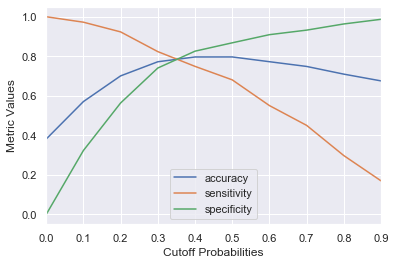

In [972]:
cutoff_df.plot.line(x = 'probs', y = ['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Cutoff Probabilities')
plt.ylabel('Metric Values')
plt.show()

- **The optimal cutoff value appears to be at 0.3, where sensitivity = specificity = accuracy = 0.7, approx**

In [973]:
y_train_pred_fin['Final Predicted'] = y_train_pred_fin.Conversion_prob.map(lambda x: 1 if x > 0.30 else 0)

## 8.0 Evaluation of the model

In [974]:
y_train_pred_fin.head()

,Converted,Conversion_prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,0,0.262429,641410,1,1,1,0,0,0,0,0,0,0,0
1,0,0.207143,597687,1,1,1,0,0,0,0,0,0,0,0
2,0,0.371653,626825,1,1,1,1,0,0,0,0,0,0,1
3,0,0.827425,587928,1,1,1,1,1,1,1,1,1,0,1
4,0,0.262429,622366,1,1,1,0,0,0,0,0,0,0,0


In [975]:
accuracy = metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin['Final Predicted'])
accuracy

0.7722634508348795

* The accuracy of this model is pretty good, at 0.793

In [976]:
confusion = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin['Final Predicted'])

In [977]:
tn = confusion[0][0]
fp = confusion[0][1]
fn = confusion[1][0]
tp = confusion[1][1]

### 8.1 Training Metrics
 - We can see from the below that `sensitivity` is 0.833, `specificity` is 0.77
 - The other metrics are also calculated

In [978]:
print('Training Set Metrics:')
print('='*21)
print(f'Accuracy                   = {round(accuracy, 3)*100} ')
sensitivity = tp/(tp + fn)
print(f'Sensitivity (= Recall)     = {round(sensitivity, 4)*100}')

specificity = tn/(tn + fp)
print(f'Specificity (= TNR)        = {round(specificity, 3)*100}')

precision = tp/(tp + fp)
ppr = precision
print(f'Precision (= PPR)          = {round(ppr, 3)*100}')

npr = tn/(tn + fn)
print(f'NPR                        = {round(npr, 3)*100}')

fpr = fp/(fp + tn)
print(f'FPR ( = 1 - Specificity)   = {round(fpr, 4)*100}')

Training Set Metrics:
Accuracy                   = 77.2 
Sensitivity (= Recall)     = 82.36
Specificity (= TNR)        = 74.1
Precision (= PPR)          = 66.2
NPR                        = 87.2
FPR ( = 1 - Specificity)   = 25.94


In [979]:
metrics.precision_score(y_train_pred_fin.Converted, y_train_pred_fin['Final Predicted'])

0.6617790811339198

In [980]:
metrics.recall_score(y_train_pred_fin.Converted, y_train_pred_fin['Final Predicted'])

0.8236009732360098

In [981]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_fin.Converted, y_train_pred_fin['Conversion_prob'])

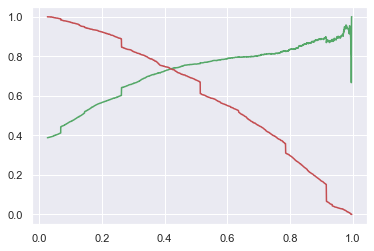

In [982]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

* Precision-Recall curve for this analysis shows that the P-R curves intersect at bout 0.75
* The Precision value of our dataset is not really great, but given the other metrics, we could possibly accept this

## 9.0 Test Set Predictions, Metrics

- We now perform the same operations of Scaling of numerical columns and then prediction using all columns on the Test set
- Then we calculate the sensitivity, specificity and other metrics

In [983]:
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Others,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Others,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,
619003,1.431352,0.964504,2.890031,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
636884,-1.024760,-0.885371,-1.183540,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
590281,0.510310,-0.777416,1.362442,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
579892,-1.024760,-0.885371,-1.183540,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
617929,-1.024760,-0.885371,-1.183540,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


- The columns that were dropped on the training set must all be dropped from the test-set as well
- This will ensure that the operations are performed on the same columns of the test-set

In [984]:
X_test = X_test.drop(['Page Views Per Visit'], axis = 1)

In [985]:
s1 = set(X_train.columns)
s2 = set(X_test.columns)
dropCols = s2.difference(s1)
dropCols

{'LastActivity_Email Link Clicked',
 'LastActivity_Form Submitted on Website',
 'LastActivity_Page Visited on Website',
 'LeadSource_Others',
 'Occupation_Housewife',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional'}

In [986]:
X_test = X_test.drop(dropCols, axis = 1)

In [987]:
X_test_sm = sm.add_constant(X_test)

In [988]:
y_test_pred = res.predict(X_test_sm)

In [989]:
y_test_pred[:10]

Lead Number
619003    0.773217
636884    0.916035
590281    0.156352
579892    0.068842
617929    0.785994
579992    0.596116
643289    0.511069
581637    0.202348
588474    0.103759
609001    0.333298
dtype: float64

In [990]:
y_pred_df = pd.DataFrame(y_test_pred)

In [991]:
y_pred_df.head()

,0
Lead Number,
619003,0.773217
636884,0.916035
590281,0.156352
579892,0.068842
617929,0.785994


In [992]:
y_test_df = pd.DataFrame(y_test)

In [993]:
y_test_df['LeadID'] = y_test_df.index

In [994]:
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [995]:
y_pred_fin = pd.concat([y_test_df, y_pred_df],axis=1)

In [996]:
y_pred_fin.head()

,Converted,LeadID,0
0,1,619003,0.773217
1,1,636884,0.916035
2,1,590281,0.156352
3,0,579892,0.068842
4,1,617929,0.785994


- Create a dataframe with the LeadID, Converstion Probability, the columns Converted and the final predicted value
- Using the confusion matrix then determined, calculate the evaluation metrics

In [997]:
y_pred_fin= y_pred_fin.rename(columns={ 0 : 'Conversion_prob'})

In [998]:
y_pred_fin.head()

,Converted,LeadID,Conversion_prob
0,1,619003,0.773217
1,1,636884,0.916035
2,1,590281,0.156352
3,0,579892,0.068842
4,1,617929,0.785994


In [999]:
y_pred_fin = y_pred_fin.reindex(['Converted', 'LeadID', 'Conversion_prob'], axis=1)

In [1000]:
y_pred_fin['final_predicted'] = y_pred_fin.Conversion_prob.map(lambda x: 1 if x > 0.30 else 0)

In [1001]:
y_pred_fin.head()

,Converted,LeadID,Conversion_prob,final_predicted
0,1,619003,0.773217,1
1,1,636884,0.916035,1
2,1,590281,0.156352,0
3,0,579892,0.068842,0
4,1,617929,0.785994,1


### 9.1 Evaluation of Metrics

- We now calculate and assess the metrics of the Test Set Prediction

In [1002]:
accuracy = metrics.accuracy_score(y_pred_fin.Converted, y_pred_fin.final_predicted)

In [1003]:
confusion2 = metrics.confusion_matrix(y_pred_fin.Converted, y_pred_fin.final_predicted )
confusion2

array([[1236,  441],
       [ 192,  903]])

In [1004]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1005]:
print('Test Set Metrics:')
print('='*17)
print(f'Accuracy                   = {round(accuracy, 3)*100} ')
sensitivity = TP/(TP + FN)
print(f'Sensitivity (= Recall)     = {round(sensitivity, 3)*100}')

specificity = TN/(TN + FP)
print(f'Specificity (= TNR)        = {round(specificity, 3)*100}')

precision = TP/(TP + FP)
ppr = precision
print(f'Precision (= PPR)          = {round(ppr, 3)*100}')

npr = TN/(TN + FN)
print(f'NPR                        = {round(npr, 3)*100}')

fpr = FP/(FP + TN)
print(f'FPR ( = 1 - Specificity)   = {round(fpr, 3)*100}')

Test Set Metrics:
Accuracy                   = 77.2 
Sensitivity (= Recall)     = 82.5
Specificity (= TNR)        = 73.7
Precision (= PPR)          = 67.2
NPR                        = 86.6
FPR ( = 1 - Specificity)   = 26.3


- We see that the different metrics are as indicated below:
    1. Accuracy = 77.2%
    2. Sensitivity = 82.5%
    3. Specificity = 73.7%
    4. Precision = 67.2%
    5. NPR = 86.6%

* Since these metrics are all quite consistent with the values obtained in the training set, we can be assured that the model is good and has predicted values from the test-set correctly
* This is the model to be used
* We now just multiply the Converstion Probability by 100 and get the **Lead Score**
* This model can be used to any new data set with the same columns, to find out **Lead Score**
* Based on this, the Sales team can decide if a person is a prospective conversion lead or not

## 10.0 Calculation of Lead Score, Conclusion

### 10. 1 Lead Score

In [1006]:
y_pred_fin['Lead Score'] = round(y_pred_fin.Conversion_prob*100, 2)
y_pred_fin.head()

,Converted,LeadID,Conversion_prob,final_predicted,Lead Score
0,1,619003,0.773217,1,77.32
1,1,636884,0.916035,1,91.60
2,1,590281,0.156352,0,15.64
3,0,579892,0.068842,0,6.88
4,1,617929,0.785994,1,78.60


### 10.2 Conclusion

* It has been shown that the Sensitivity of the prediction model is 82.3%, if the threshold is 30%
* So, if the sales team follows up every lead with a lead-score of more than 30%, there is a high probability that the lead will get converted (acquired)
* So, this model can be successfully used by the sales team to find out which leads to pursue and then ensure acquisition
* Further, there is a very high probability of converting 80% of the leads will get converted if the leads are pursued in this concerted manner

#### Some Aspects of this Analysis:

* The analysis presented above is only one of many that were run
* The analysis was run with different parameters changed:
    - In one case, null-rows or Occupation were all deleted
    - In another case, values within Last Activity and Specialization were grouped into just 3 groups
    - In another case that was tried, Specialization was imputed using proportional imputation
* In some of these cases, the Sensitivity during Training was lower (81%) but that during testing was quite high (89%), but the specificity suffered quite a bit (62% during testing, as against 70% during training)
* However, the above selected method showd consistent values of Sensitivity and Specificity even across runs with different train-test split random states (though the columns considered changed)
* **Hence this model was the one that was considered finally**